Name: Satvika Neti

Andrew ID: sneti

Collaborators (if none, say "none"; do *not* leave this blank):

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] Basic Text Analysis [45 pts]

This problem involves a mix of Python review (loops, conditionals, counters/dictionaries, sorting) and learning to work with a sizable collection of text data.

You will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English) called *Zipf's law*, which relates how frequently a word occurs in a language to its "rank" (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In particular, the word with rank 1 appears twice as likely as the word with rank 2, and the three times as likely as the word with rank 3, and so forth. (Some details on Zipf's law can be found on [Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law).) In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

**Throughout this problem, do not remove stopwords.**

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser', 'tagger'])
`

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)); these 100 books form the corpus that we consider for this problem. Each file contains the text of a book. We will read in all 100 books.

Note: Please *do not* change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will not receive points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

**(a) [5 pts]** As a warm-up, write a loop that iterates through all 100 books; for each book, print out its corresponding file name and also how long the book is in terms of string length (meaning that if we load in the book as a string, we compute the length of the string using the built-in Python function `len`).

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [ ]:
import glob

allfilenames = glob.glob('./HW1_Dataset/*.txt')

for file in allfilenames:
    f = open(file, "r", encoding="utf8")
    print(file, len(f.read()))
    f.close()

**(b) [15 pts]** Build a term frequency table for all 100 books. Specifically, building on your solution to part (a), read in a single book at a time and for each book, do the following two steps:

  1. Process the text by separating and lemmatizing the words.
  2. Count the number of times each word appears in the book and add these to a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)

Note that unlike in part (a), this time around, there's no need to print out the file names and how long each book is.

After looping through all 100 books, you should have the term frequency table for the entire corpus (importantly, the frequency table should not just be for a single book; it should be for all 100 books). Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [ ]:
import spacy
from collections import Counter
import re
from operator import itemgetter

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])
nlp.max_length = 5465100

histogram = Counter()

#only doing a subset bc all of them gives my computer a memory allocation error at around ~55 books
for file in allfilenames[:50]:
    print(file)
    text = open(file, "r", encoding="utf8").read()

    parsed_text = nlp(text)
    
    for token in parsed_text:
        lemma = token.lemma_.lower()
        if (re.match('[a-zA-Z]+$', lemma)):
            histogram[lemma] += 1

In [ ]:
sortedhist = sorted(histogram.items(),
                    reverse=True,
                    key=itemgetter(1))

for lemma, count in sortedhist:
    print(lemma, ":", count)

**(c) [10 pts]** Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

numlemmas = 50
ranks = range(numlemmas)
counts = [count for lemma, count in sortedhist[:numlemmas]]

plt.scatter(ranks, counts)

In [ ]:
# Log-log plot
plt.loglog(ranks,counts)

**(d) [15 pts]** Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): No, this deosn't seem consistent with Zipf's law. The initial raw plot does look consistent, but in a loglog plot it should be diagonal and linear, but there is a significant curve to it. 

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [ ]:
totnum = sum([count for lemma, count in sortedhist])

print('Probability of drawing one of the 4 most frequent words: ')

top4 = sum([count for lemma, count in sortedhist[:4]])

print((top4/totnum)*100, "%")

print('Probability of drawing one of the 50 most frequent words: ')

top50 = sum([count for lemma, count in sortedhist[:50]])

print((top50/totnum)*100, "%")

- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [ ]:
print("Occur only once: ")

onlyonce = [count for lemma, count in sortedhist if count == 1]

print(len(onlyonce)/len(sortedhist))

print("Occur fewer than 10 times: ")

fewer10 = [count for lemma, count in sortedhist if count <10]

print(len(fewer10)/len(sortedhist))



### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger'])
`


**(a) [15 pts]** Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]

In [2]:
from operator import itemgetter

label_counter = Counter()

for parsed_text in reuters_nlp:
    alllabels = set()
    for entity in parsed_text.ents:
        alllabels.add(entity.label_)
    for label in alllabels:
        label_counter[label] += 1
        
sortedlabels = sorted(label_counter.items(),
                    reverse=True,
                    key=itemgetter(1))

for label, count in sortedlabels:
    print(label, count)

ORG 10321
CARDINAL 9258
DATE 7964
GPE 5416
PERSON 4253
QUANTITY 3456
NORP 2516
MONEY 2110
ORDINAL 857
LOC 836
PRODUCT 825
TIME 612
LAW 244
FAC 219
EVENT 143
WORK_OF_ART 131
PERCENT 87
LANGUAGE 20


Text(0, 0.5, 'Raw count')

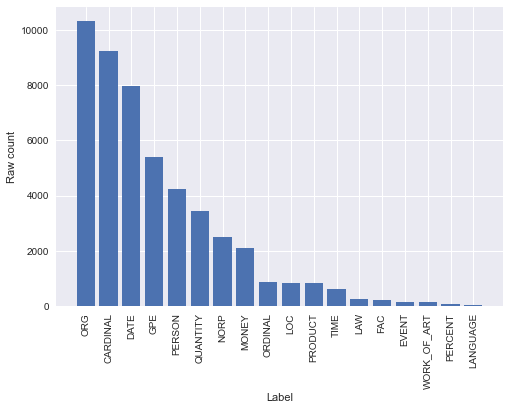

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)

numtoplot = len(sortedlabels)
labels = [lemma for lemma, count in sortedlabels]
counts = [count for lemma, count in sortedlabels]
plt.bar(range(numtoplot), counts)
plt.xticks(range(numtoplot), labels, rotation=90)
plt.xlabel('Label')
plt.ylabel('Raw count')

**(b) [15 pts]** Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (geopolitical entity such as countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [20]:
org_counts = Counter()
gpe_counts = Counter()

for parsed_text in reuters_nlp:
    org_ents = set([entity.text.lower() for entity in parsed_text.ents if entity.label_ == "ORG"])
    gpe_ents = set([entity.text.lower() for entity in parsed_text.ents if entity.label_ == "GPE"])
    for ent in org_ents:
        org_counts[ent] += 1
    for ent in gpe_ents:
        gpe_counts[ent] += 1
        
sortedorgs = sorted(org_counts.items(), reverse=True, key=itemgetter(1))
sortedgpes = sorted(gpe_counts.items(), reverse=True, key=itemgetter(1))

print("Top 10 ORG entitites")
for label, count in sortedorgs[:10]:
    print(label, count)
    
print("\nTop 10 GPE entities")
for label, count in sortedgpes[:10]:
    print(label, count)

Top 10 ORG entitites
revs 777
reuters 447
nine 385
shr 324
oper 289
the securities and exchange commission 248
usda 225
ec 224
fed 206
pct 197

Top 10 GPE entities
u.s. 1559
japan 554
avg 459
the united states 382
u.k. 296
canada 283
new york 253
west germany 234
washington 228
london 213
set()


**(c) [20 pts]** Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [38]:
import numpy as np

gpe_opec_counts = Counter()

for parsed_text in reuters_nlp:
    gpe_ents = set([entity.text.lower() for entity in parsed_text.ents if entity.label_ == "GPE"])
    opec = 1 if len([entity.text.lower() for entity in parsed_text.ents if entity.text.lower() == "opec"]) > 0 else 0
    if opec: 
        for ent in gpe_ents:
            gpe_opec_counts[ent] += 1
            
sortedopeccounts = sorted(gpe_opec_counts.items(), reverse=True, key=itemgetter(1))

counts = np.array([count for ent, count in sortedopeccounts])
joint_prob = counts/counts.sum()

sortedopecprobs = list(zip([ent for ent, count in sortedopeccounts], joint_prob))

for ent, count in sortedopecprobs[:50]:
    print(ent, ":", count)


u.s. : 0.08478260869565217
saudi arabia : 0.06086956521739131
kuwait : 0.058695652173913045
ecuador : 0.05434782608695652
vienna : 0.03695652173913044
qatar : 0.034782608695652174
venezuela : 0.034782608695652174
saudi arabia's : 0.02608695652173913
iraq : 0.02608695652173913
the united arab emirates : 0.02391304347826087
japan : 0.02391304347826087
iran : 0.02391304347826087
nigeria : 0.021739130434782608
balao : 0.017391304347826087
the united states : 0.017391304347826087
opec : 0.015217391304347827
uae : 0.015217391304347827
britain : 0.015217391304347827
mexico : 0.013043478260869565
indonesia : 0.013043478260869565
libya : 0.013043478260869565
algeria : 0.013043478260869565
the neutral zone : 0.010869565217391304
norway : 0.010869565217391304
dubai : 0.010869565217391304
new york : 0.010869565217391304
egypt : 0.010869565217391304
the soviet union : 0.010869565217391304
u.k. : 0.010869565217391304
canada : 0.010869565217391304
caracas : 0.010869565217391304
colombia : 0.008695652

Your text answer (for this question, your answer is *not* code): I guess I would have guessed that doing this exercise would have given you the OPEC countries, but what we get instead is both the OPEC countries and countries that do trade/work with OPEC countries. I was also surprised to see some cities very high up on this list - I wouldn't have thought that that would happen. It was also surprising that a lot of the OPEC countries like Kuwait or Emirates were so low on the list. 

### [Problem 3] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://forms.gle/QokfgNxGwFwmUMbF6